# Lending Club Case study

In this case study, I will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

The aim is to identify patterns which indicate if a person is likely to default for given data set



## 1.Reading and Inspection



In [2]:
#Import required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#load data set for inspection
lending_data_records = pd.read_csv('loan.csv')

/tmp/ipykernel_1435/1660224987.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  lending_data_records = pd.read_csv('loan.csv')


In [4]:
lending_data_records.shape

(39717, 111)

In [5]:
lending_data_records.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
lending_data_records.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(list(lending_data_records.columns))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [8]:
lending_data_records.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## 2.Data Cleaning



### 2.1 fix rows and columns

Delete all blank rows and columns , many were present during data inspection



In [9]:
#delete all blank columns
lending_data = lending_data_records.dropna(axis=1, how='all')
lending_data.shape

(39717, 57)

In [10]:
#delete all blank rows
lending_data = lending_data.dropna(axis=0, how='all')
lending_data.shape

(39717, 57)

In [11]:
#delete all columns with only one value as it doesn't add any value to analysis
lending_data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [12]:
#get all single value columns 
drop_cols = lending_data.columns[lending_data.nunique() <= 1]
drop_cols.shape

(9,)

In [13]:
#drop single value column
lending_data = lending_data.drop(drop_cols,axis=1)
lending_data.shape

(39717, 48)

In [14]:
print(list(lending_data.columns))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies']


In [15]:
lending_data[['url', 'desc', 'purpose','title']].tail(10)

,url,desc,purpose,title
39707,https://lendingclub.com/browse/loanDetail.acti...,Need a loan to make some home improvments,home_improvement,home improvment loan
39708,https://lendingclub.com/browse/loanDetail.acti...,I would like to pay off my high-interest credi...,debt_consolidation,Tito5000
39709,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,P's Family Credit Loan
39710,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,My Credit Card Loan
39711,https://lendingclub.com/browse/loanDetail.acti...,I'd like to shift some credit card debt so it ...,credit_card,Reduce Credit Card Debt
39712,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement
39713,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt
39714,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation
39715,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan
39716,https://lendingclub.com/browse/loanDetail.acti...,"I plan to consolidate over $7,000 of debt: a c...",debt_consolidation,Consolidation Loan


In [16]:
lending_data['purpose'].value_counts()

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64

In [17]:
lending_data[['total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt']].head()

,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt
0,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62
1,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66
2,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91
3,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48
4,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79


#### Delete columns which doesn't add value to analysis

- redundant columns which have info covered by other columns
  - sub\_grade, total\_pymnt\_inv, funded\_amnt\_inv ,'out\_prncp\_inv'
- no value add
  - 'id', 'member\_id','url', 'desc','title', 'earliest\_cr\_line', 'inq\_last\_6mths', 'total\_rec\_prncp', 'total\_rec\_int', 'total\_rec\_late\_fee', 'recoveries', 'collection\_recovery\_fee', 'last\_pymnt\_d', 'last\_pymnt\_amnt','emp\_title','installment','issue\_d','total\_acc','out\_prncp','total\_pymnt'



In [18]:
not_required_col = ['sub_grade', 'total_pymnt_inv', 'funded_amnt_inv' ,'out_prncp_inv','id', 'member_id','url', 'desc','title', 'earliest_cr_line', 'inq_last_6mths', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt','emp_title','installment','issue_d','total_acc','out_prncp','total_pymnt']
lending_data = lending_data.drop(not_required_col,axis=1)
lending_data.shape
  

(39717, 24)

In [19]:
print(list(lending_data.columns))

['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies']


### 2.2 Fix missing values

Delete columns/rows which have significant/insignificant missing values



In [20]:
#finding percentage of null value in each column
100*lending_data.isnull().sum()/len(lending_data)

loan_amnt                  0.000000
funded_amnt                0.000000
term                       0.000000
int_rate                   0.000000
grade                      0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
loan_status                0.000000
purpose                    0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
next_pymnt_d              97.129693
last_credit_pull_d         0.005036
pub_rec_bankruptcies       1.754916
dtype: float64

In [21]:
#deleting columns with more than 90% percent null
lending_data = lending_data.drop(['mths_since_last_record','next_pymnt_d'], axis=1)
lending_data.shape

(39717, 22)

In [22]:
#deleting rows of the columns which are null, and they are in small percentage , they will not influence analysis 
lending_data = lending_data.dropna(subset =['emp_length','revol_util','last_credit_pull_d','pub_rec_bankruptcies'])
lending_data.shape

(37897, 22)

In [23]:
#finding percentage of null after major cleanup
100*lending_data.isnull().sum()/len(lending_data) 

loan_amnt                  0.000000
funded_amnt                0.000000
term                       0.000000
int_rate                   0.000000
grade                      0.000000
emp_length                 0.000000
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
loan_status                0.000000
purpose                    0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
mths_since_last_delinq    65.733435
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.000000
last_credit_pull_d         0.000000
pub_rec_bankruptcies       0.000000
dtype: float64

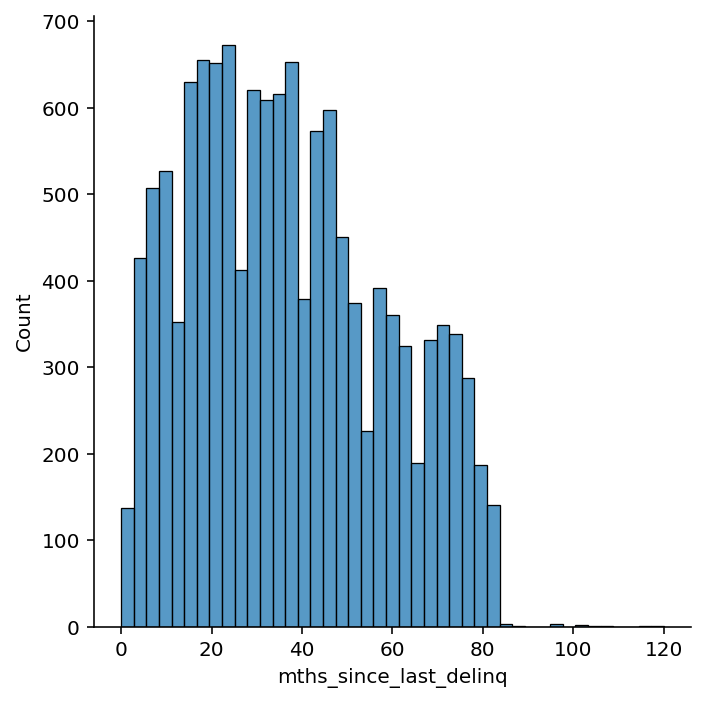

In [24]:
 sns.displot(lending_data['mths_since_last_delinq'])

In [25]:
 lending_data['mths_since_last_delinq'].describe()

count    12986.000000
mean        37.059218
std         21.394408
min          0.000000
25%         20.000000
50%         35.000000
75%         53.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

##### column 'mths\_since\_last\_delinq' is very important for analysing "likely to be defaulter", so not deleting the column even it has more than 50 percent null values,

##### Imputing value will not be right as it may influence the analysis in wrong way, so will be deleting all rows with null values

Assuming among total loan applicants , likely defaulters data will be small subset



In [26]:
lending_data = lending_data.dropna(subset =['mths_since_last_delinq'])
lending_data.shape

(12986, 22)

In [27]:
lending_data.isnull().sum()

loan_amnt                 0
funded_amnt               0
term                      0
int_rate                  0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
zip_code                  0
addr_state                0
dti                       0
delinq_2yrs               0
mths_since_last_delinq    0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
last_credit_pull_d        0
pub_rec_bankruptcies      0
dtype: int64

In [28]:
lending_data['emp_length'].head()

3     10+ years
4        1 year
16      4 years
18       1 year
27      2 years
Name: emp_length, dtype: object

### 2.3 Standardise values

Converting column values to standard values which can be analysed easily

ex: 'emp\_length' should be considered as,  0  year if &lt;1 year,   10 year if 10\+ years according case study requirement given, so converting the column to 

right data type, for easy analysis



In [29]:
lending_data['emp_length'] = lending_data['emp_length'].str.replace('< 1', '0')
lending_data['emp_length']=lending_data['emp_length'].apply(lambda x:int(x[:2]))

In [30]:
lending_data['emp_length'].value_counts()

emp_length
10    3219
2     1414
3     1370
0     1345
4     1182
5     1093
1     1030
6      752
7      640
8      532
9      409
Name: count, dtype: int64

In [31]:
print(list(lending_data.columns))


['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'last_credit_pull_d', 'pub_rec_bankruptcies']


{'whiskers': [<matplotlib.lines.Line2D at 0x7f6b9506a320>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6b9506a860>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6b9506a080>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6b9506ada0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6b9506b040>],
 'means': []}

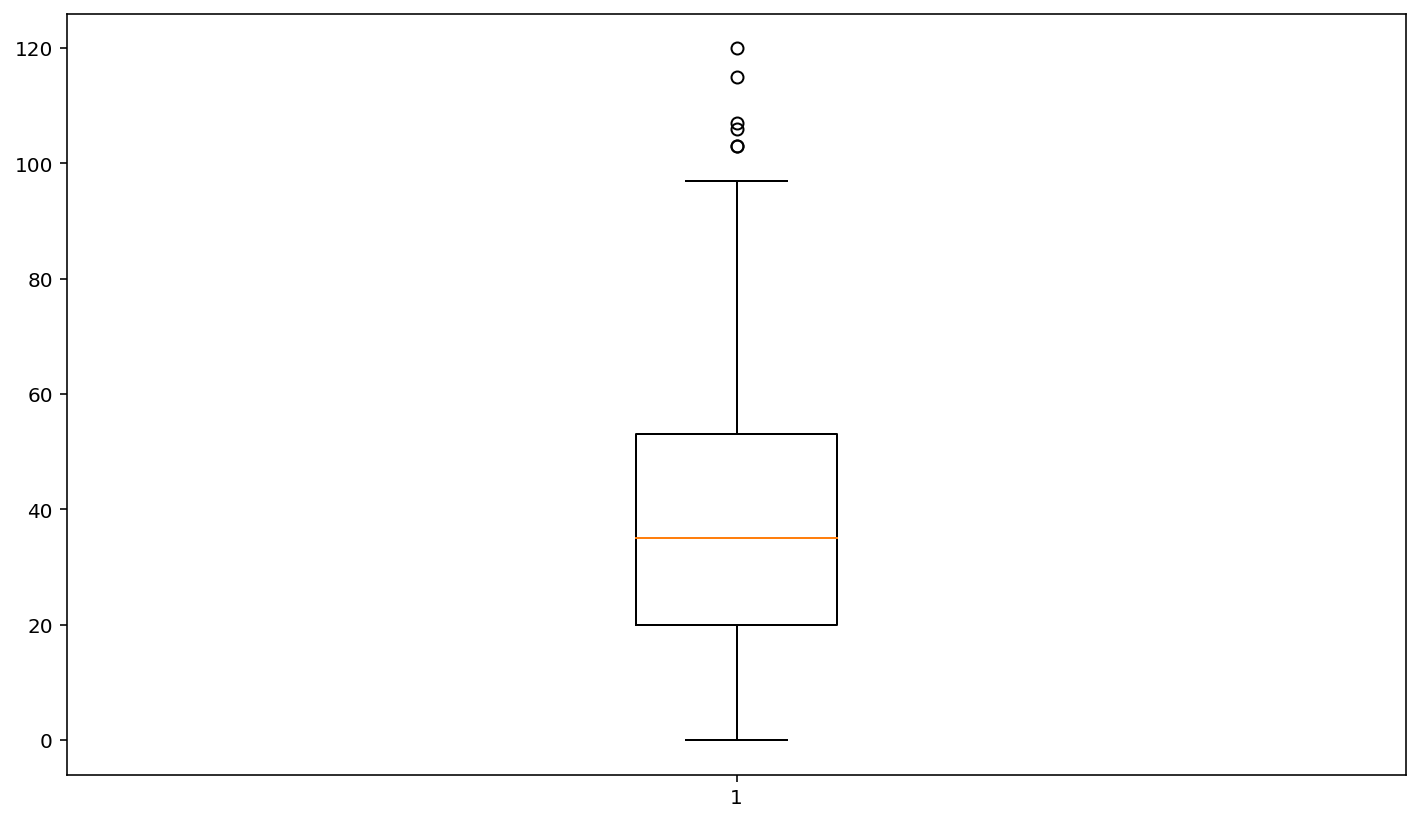

In [32]:
plt.boxplot(lending_data['mths_since_last_delinq']) 

In [33]:
#removing outliers
lending_data = lending_data[lending_data['mths_since_last_delinq'].between(lending_data['mths_since_last_delinq'].quantile(.05),lending_data['mths_since_last_delinq'].quantile(.95))]

In [34]:
lending_data['mths_since_last_delinq'].value_counts().sort_values()

mths_since_last_delinq
65.0     91
64.0     95
66.0     98
69.0    103
61.0    104
       ... 
24.0    228
38.0    228
23.0    233
15.0    236
30.0    239
Name: count, Length: 70, dtype: int64

In [35]:
lending_data['mths_since_last_delinq'].describe()

count    11795.000000
mean        36.423145
std         18.821725
min          6.000000
25%         21.000000
50%         35.000000
75%         50.000000
max         75.000000
Name: mths_since_last_delinq, dtype: float64

### 2.4 Fix invalid values



#### Checking datatypes and setting it right



In [36]:
lending_data.dtypes

loan_amnt                   int64
funded_amnt                 int64
term                       object
int_rate                   object
grade                      object
emp_length                  int64
home_ownership             object
annual_inc                float64
verification_status        object
loan_status                object
purpose                    object
zip_code                   object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
mths_since_last_delinq    float64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                 object
last_credit_pull_d         object
pub_rec_bankruptcies      float64
dtype: object

In [37]:
lending_data['term']=lending_data['term'].apply(lambda x:int(x[:3]))

In [38]:
lending_data['int_rate']=lending_data['int_rate'].str.strip('%')

In [39]:
lending_data['int_rate']=lending_data['int_rate'].astype('float64')

In [40]:
lending_data['revol_util']=lending_data['revol_util'].apply(lambda x: float(x.strip('%')))

In [41]:
lending_data.dtypes

loan_amnt                   int64
funded_amnt                 int64
term                        int64
int_rate                  float64
grade                      object
emp_length                  int64
home_ownership             object
annual_inc                float64
verification_status        object
loan_status                object
purpose                    object
zip_code                   object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
mths_since_last_delinq    float64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                float64
last_credit_pull_d         object
pub_rec_bankruptcies      float64
dtype: object

### 2.5 Filter data

removing if any duplicate rows



In [42]:
duplicate = lending_data[lending_data.duplicated()]
duplicate

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,addr_state,dti,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,last_credit_pull_d,pub_rec_bankruptcies


In [43]:
default_records = lending_data[lending_data['loan_status'] == 'Charged Off'] 
default_records.shape

(1748, 22)

In [44]:
lending_data.shape

(11795, 22)

## 3.Univariate Analysis



##### Analysing dti: Debt to Income variable as it helps to check the healthier income to debt ratio



In [45]:
lending_data['dti'].describe()

count    11795.000000
mean        12.941554
std          6.455989
min          0.000000
25%          8.000000
50%         13.020000
75%         18.000000
max         29.990000
Name: dti, dtype: float64

##### dti less than 36 percent is considered good , median of dti value is in valid range, this variable is not influencing factor



#### Analysing verification\_status



<AxesSubplot: xlabel='verification_status'>

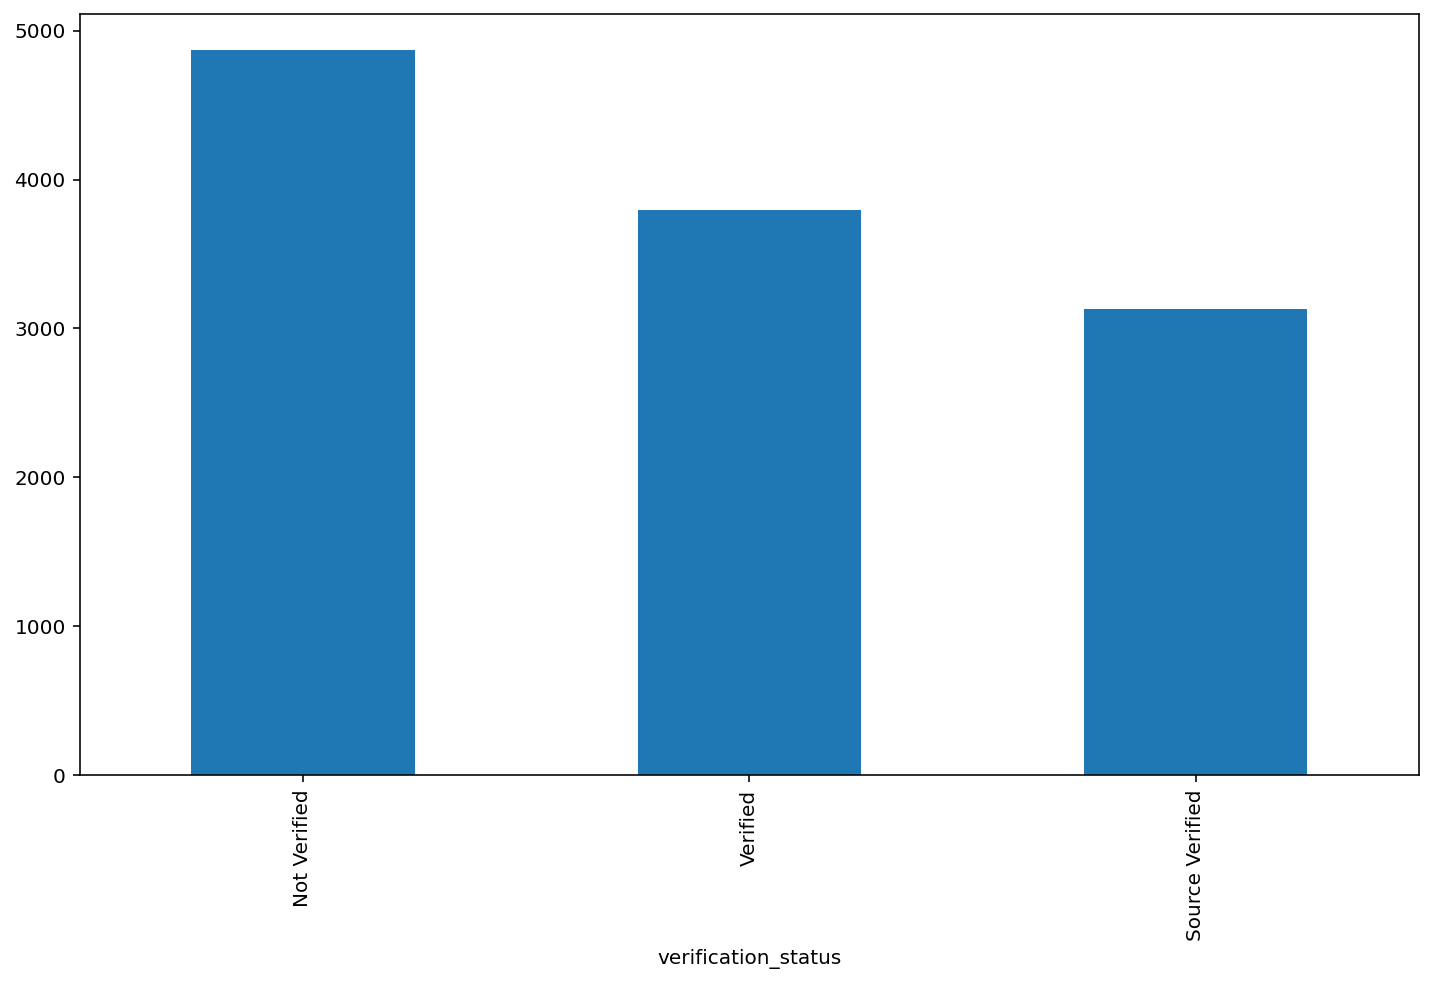

In [46]:
lending_data['verification_status'].value_counts().plot.bar()

By above graph we can understand that significant portion of the user are Not verified, this variable may be helpful 



#### Analysing Annual income



In [47]:
lending_data['annual_inc'].value_counts()

annual_inc
60000.00     491
50000.00     319
65000.00     259
40000.00     237
48000.00     231
            ... 
91745.00       1
63052.00       1
45314.00       1
35088.00       1
100671.39      1
Name: count, Length: 2054, dtype: int64

#### Analysing loan\_status



<AxesSubplot: xlabel='loan_status'>

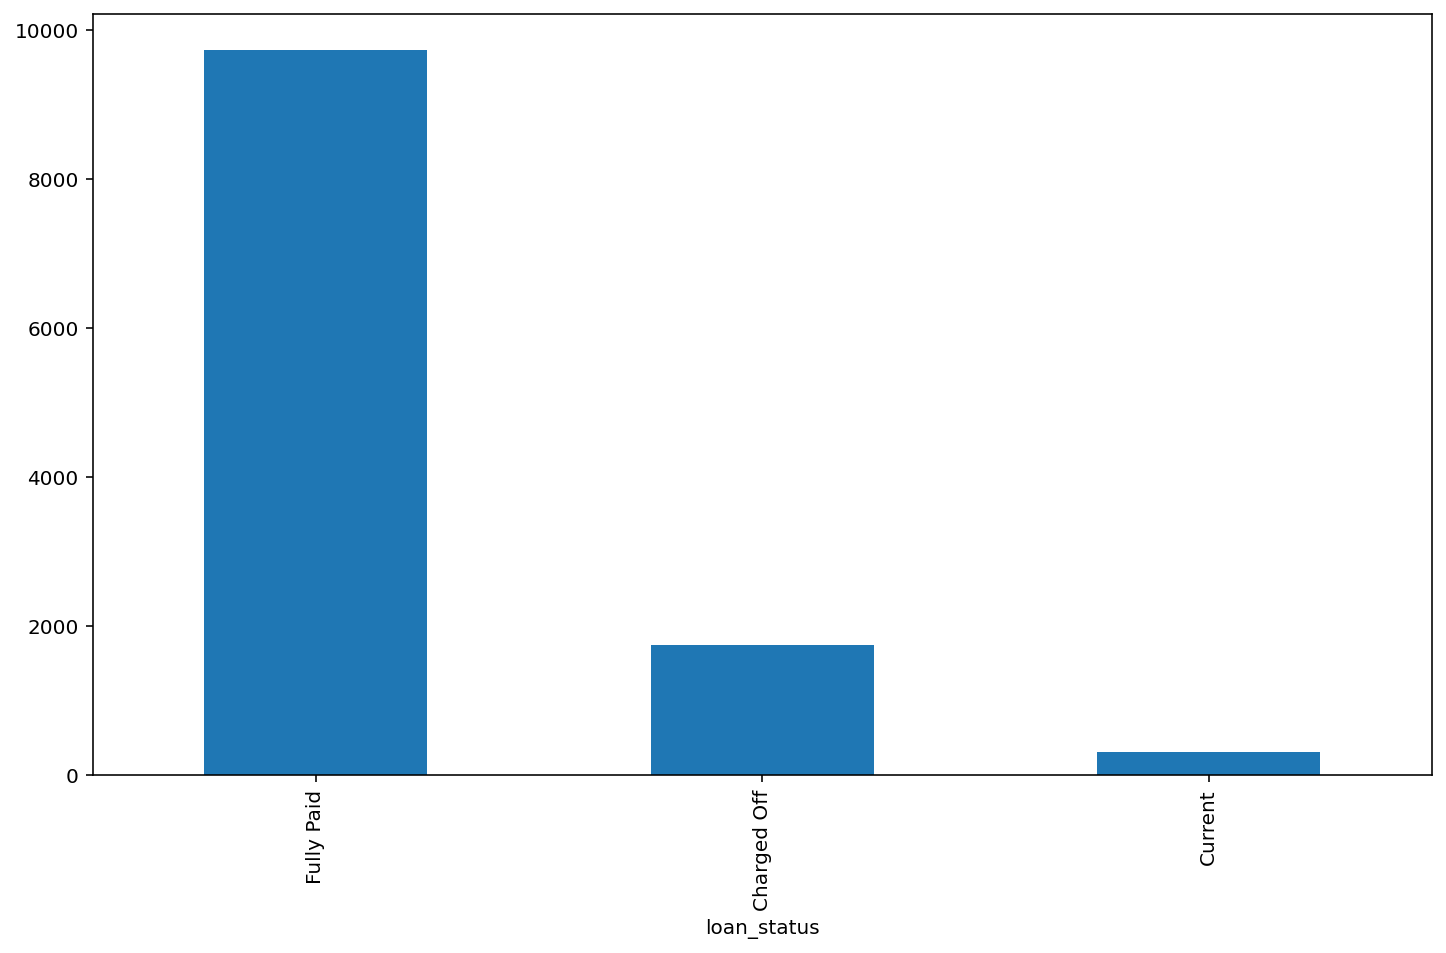

In [48]:
lending_data['loan_status'].value_counts().plot.bar()

### Analysing revol\_util: Revolving line utilization rate



In [49]:
lending_data['revol_util'].describe()

count    11795.000000
mean        49.227798
std         27.718508
min          0.000000
25%         27.100000
50%         49.600000
75%         72.000000
max         99.900000
Name: revol_util, dtype: float64

Above data shows revolving line utilization rate above 49 percent may be one of the indicator of default tendency



#### Analysing employee length



<AxesSubplot: xlabel='emp_length'>

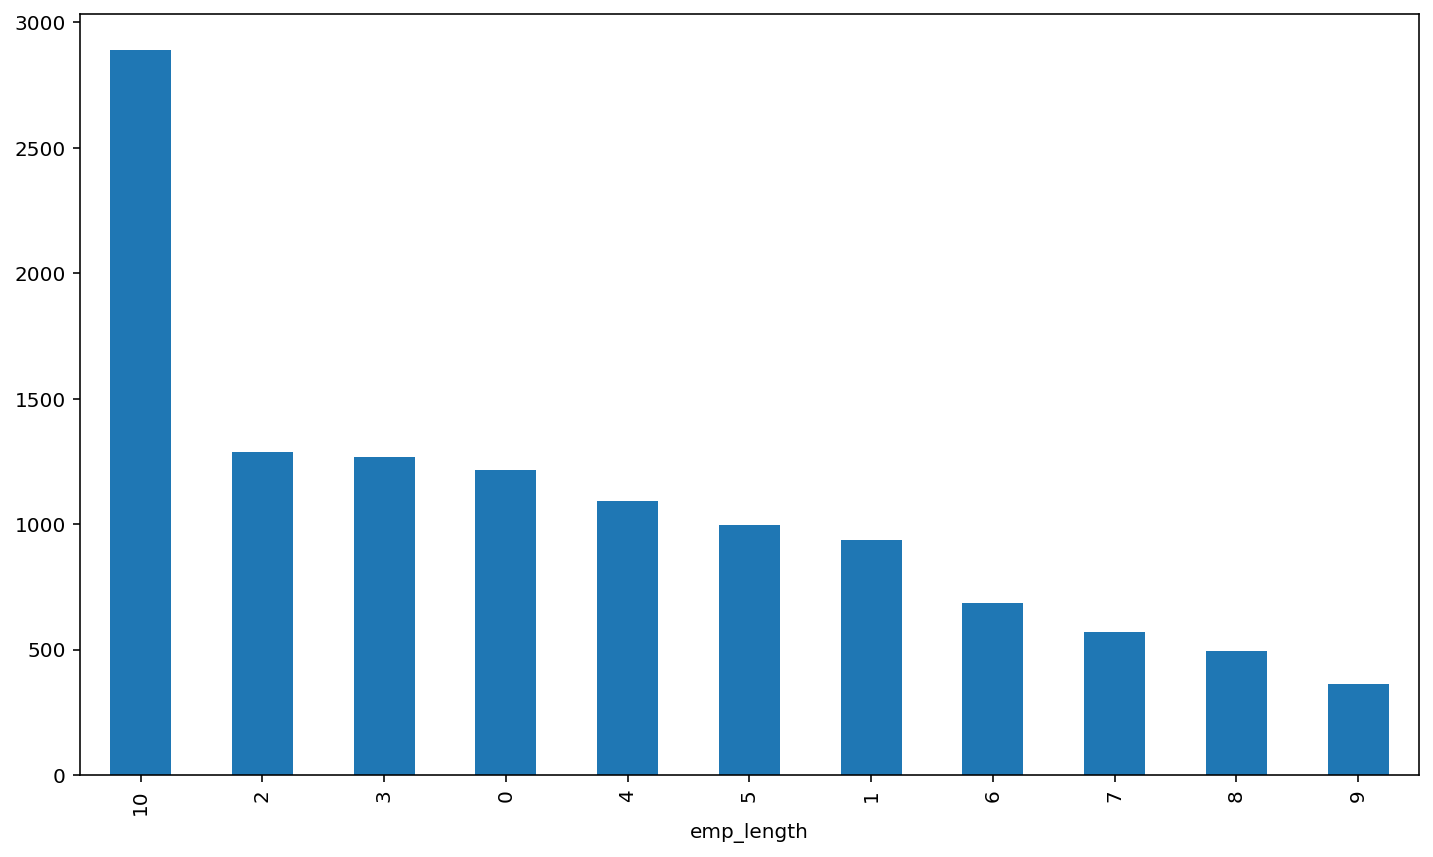

In [50]:
lending_data['emp_length'].value_counts().plot.bar()

##### Above chart clearly shows number of delinquency is high for customer with higher employment length, we will further analyse



## 4.Segmented univariate analysis



#### Analysis of revolving credit utilisation percent based on loan status



In [51]:
LSandRu= lending_data[['loan_status','revol_util']] 
grouped = LSandRu.groupby(['loan_status'])
grouped.describe()

revol_util                                                       
                 count       mean        std  min     25%    50%    75%   max
loan_status                                                                  
Charged Off     1748.0  52.837208  27.898078  0.0  32.300  54.20  76.20  99.9
Current          316.0  51.863956  26.574725  0.0  30.500  53.55  72.25  99.1
Fully Paid      9731.0  48.493827  27.669224  0.0  26.365  48.80  71.30  99.9

##### From above data we can derive that high revolving credit utilisation can influence loan defaulting



#### Analysis of employee length based on loan status



In [52]:
LSandEL= lending_data[['loan_status','emp_length']] 
grouped = LSandEL.groupby(['loan_status'])
grouped.describe()

emp_length                                               
                 count      mean       std  min  25%  50%   75%   max
loan_status                                                          
Charged Off     1748.0  5.184211  3.615831  0.0  2.0  5.0  10.0  10.0
Current          316.0  6.155063  3.550722  0.0  3.0  6.0  10.0  10.0
Fully Paid      9731.0  5.121879  3.528237  0.0  2.0  5.0   9.0  10.0

###### Not considering 'current' loan\_status numbers as it is in minimal number records compared to other 2 category,

employee length is not giving any insights [w.r.to](http://w.r.to) delinquency , as data is similar for both other categories



#### Analysis of number of months since last delinquency based on verification status



In [53]:
VSandMU = lending_data[['verification_status','mths_since_last_delinq']]
grouped = VSandMU.groupby(['verification_status'])
grouped.describe()

mths_since_last_delinq                                   \
                                     count       mean        std  min   25%   
verification_status                                                           
Not Verified                        4868.0  36.551767  18.912503  6.0  21.0   
Source Verified                     3129.0  36.346437  18.712819  6.0  21.0   
Verified                            3798.0  36.321485  18.798521  6.0  21.0   

                                       
                      50%   75%   max  
verification_status                    
Not Verified         35.0  50.0  75.0  
Source Verified      35.0  50.0  75.0  
Verified             35.0  50.0  75.0

##### Above table clearly show around 30 percent people who are not verified, have contributed to delinquency



### Analysis based on Loan Status



In [54]:
LSandMU= lending_data[['loan_status','mths_since_last_delinq']] 
grouped = LSandMU.groupby(['loan_status'])
grouped.describe()

mths_since_last_delinq                                         \
                             count       mean        std  min   25%   50%   
loan_status                                                                 
Charged Off                 1748.0  36.593822  19.456078  6.0  20.0  35.0   
Current                      316.0  35.591772  18.913197  6.0  19.0  34.0   
Fully Paid                  9731.0  36.419484  18.703770  6.0  21.0  35.0   

                          
               75%   max  
loan_status               
Charged Off  51.00  75.0  
Current      47.25  75.0  
Fully Paid   50.00  75.0

##### Above table , mean and std column clearly show number of Delinquency is high, for customer  who tend to be charged off



##### Based on Grade,  segmented variable analysis



In [55]:
GradeandMU= lending_data[['grade','mths_since_last_delinq']] 
gradeandMU = GradeandMU.groupby(['grade'])
gradeandMU.describe()

mths_since_last_delinq                                                \
                       count       mean        std  min    25%   50%   75%   
grade                                                                        
A                     1452.0  40.457989  18.924247  6.0  25.75  39.0  56.0   
B                     3294.0  37.269885  18.842250  6.0  22.00  36.0  52.0   
C                     2968.0  36.303235  18.798356  6.0  21.00  35.0  50.0   
D                     2220.0  34.901351  18.594356  6.0  19.00  33.0  48.0   
E                     1224.0  34.508170  18.320262  6.0  19.00  33.0  47.0   
F                      486.0  32.462963  18.355978  6.0  17.00  30.0  45.0   
G                      151.0  32.152318  18.923970  6.0  15.50  29.0  46.5   

             
        max  
grade        
A      75.0  
B      75.0  
C      75.0  
D      75.0  
E      75.0  
F      75.0  
G      74.0

##### Above table shows Grade A has high delinquency rate



##### Based on Home ownership,  segmented variable analysis



In [56]:
HomeOwnandMU= lending_data[['home_ownership','mths_since_last_delinq']] 
HomeOwnandMU = HomeOwnandMU.groupby(['home_ownership'])
HomeOwnandMU.describe()

mths_since_last_delinq                                          \
                                count       mean        std  min    25%   50%   
home_ownership                                                                  
MORTGAGE                       5330.0  36.588368  19.316015  6.0  20.00  35.0   
OTHER                            32.0  28.812500  20.648264  6.0  12.75  22.5   
OWN                             868.0  35.665899  19.316137  6.0  20.00  33.0   
RENT                           5565.0  36.426774  18.237457  6.0  21.00  35.0   

                            
                 75%   max  
home_ownership              
MORTGAGE        51.0  75.0  
OTHER           43.0  70.0  
OWN             49.0  75.0  
RENT            49.0  75.0

###### Based on above table we can derive that home\_ownership with MORTGAGE and RENT have high tendency towards delinquency



## 6.Bivariate analysis



#### Bivariate analysis of continuous variable

- Annual Income versus months since last delinquency



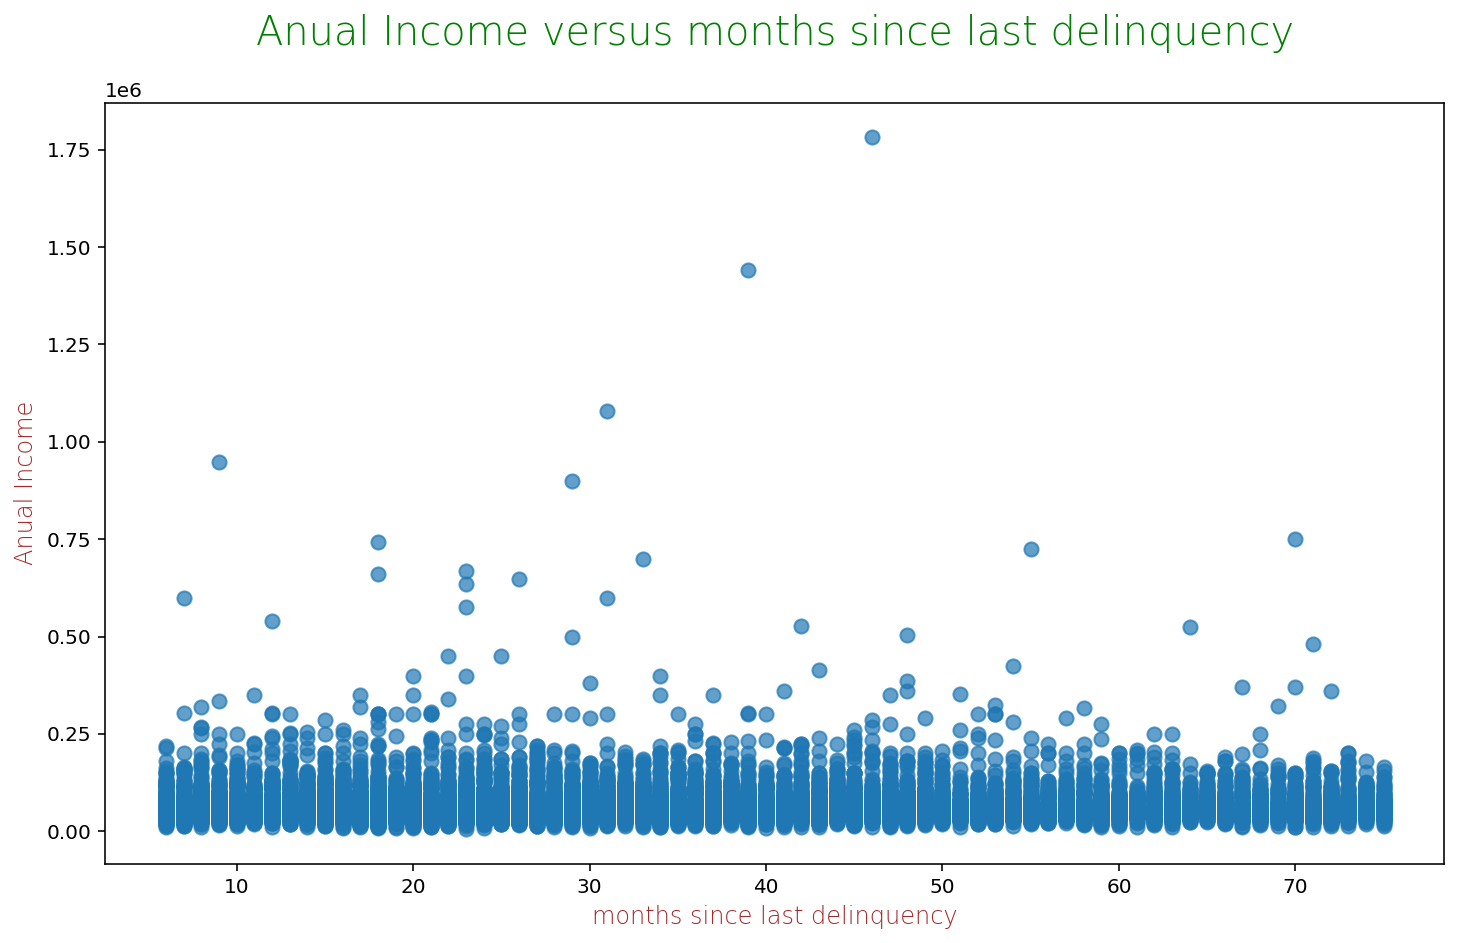

In [57]:
# plotting scatter chart

plt.scatter(lending_data['mths_since_last_delinq'], lending_data['annual_inc'], alpha= 0.7, s = 50 )

# Adding and formatting title
plt.title("Anual Income versus months since last delinquency\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("months since last delinquency", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Anual Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

###### Above chart clearly shows delinquency rate is high for lower income customer



##### Analysis of months since last delinquency across state



[Text(0.5, 0, 'States'), Text(0, 0.5, 'Months since last delinquency')]

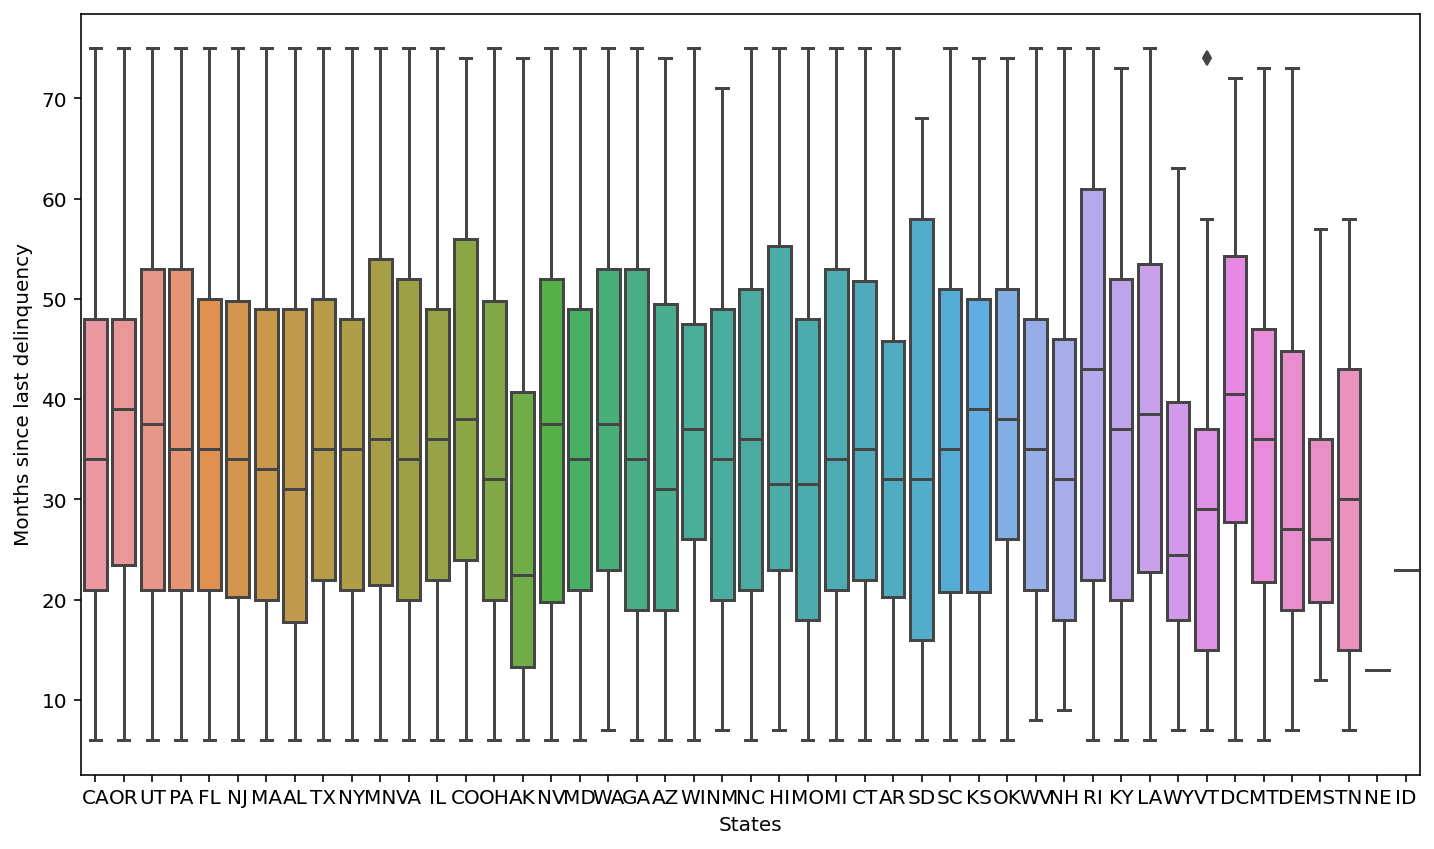

In [58]:
stateplot = sns.boxplot(x='addr_state',y='mths_since_last_delinq',data=lending_data)
 
# add label to the axis and label to the plot
stateplot.set(xlabel ="States", ylabel = "Months since last delinquency")

###### loan applicants from state 'RI' have high tendency of defaulting based on above chart



#### Bivariate categorical variable analysis

Analysing is Grade variable against months since last delinquency and annual income



In [60]:
Grade_MU_AI= lending_data[['grade','mths_since_last_delinq','annual_inc']] 
Grade_MU_AI = Grade_MU_AI.groupby(['grade'])
Grade_MU_AI.describe()

mths_since_last_delinq                                                \
                       count       mean        std  min    25%   50%   75%   
grade                                                                        
A                     1452.0  40.457989  18.924247  6.0  25.75  39.0  56.0   
B                     3294.0  37.269885  18.842250  6.0  22.00  36.0  52.0   
C                     2968.0  36.303235  18.798356  6.0  21.00  35.0  50.0   
D                     2220.0  34.901351  18.594356  6.0  19.00  33.0  48.0   
E                     1224.0  34.508170  18.320262  6.0  19.00  33.0  47.0   
F                      486.0  32.462963  18.355978  6.0  17.00  30.0  45.0   
G                      151.0  32.152318  18.923970  6.0  15.50  29.0  46.5   

            annual_inc                                                 \
        max      count          mean           std      min       25%   
grade                                                                   
A      75.0     1452.0  69310.246198  58499.576660   8500.0  43925.00   
B      75.0     3294.0  68428.345024  48079.419682   9600.0  42000.00   
C      75.0     2968.0  67134.148181  52386.054930   9600.0  41985.25   
D      75.0     2220.0  71238.464248  48216.305833   6000.0  43000.00   
E      75.0     1224.0  80122.899828  57318.184527  13920.0  48000.00   
F      75.0      486.0  88783.980185  54860.764227  15600.0  57000.00   
G      74.0      151.0  95923.966358  73969.351995  24000.0  60000.00   

                                     
           50%       75%        max  
grade                                
A      60000.0   82000.0  1440000.0  
B      60000.0   82000.0   948000.0  
C      57600.0   80000.0  1782000.0  
D      60000.0   85000.0   648000.0  
E      65000.0   95109.0   750000.0  
F      76900.0  105000.0   600000.0  
G      80000.0  112500.0   725000.0

###### from above table we can infer that Grade A with lower income have more tendency towards delinquency



## 7.Derived Metrics

Deriving metrics out of existing columns



##### Business driven metrics derived from history of records based on, number of derogatory public record & bankruptcies & history of default in last 2 year



In [61]:
loan_data_subset =lending_data.pivot_table(values=['delinq_2yrs','pub_rec_bankruptcies','pub_rec','revol_util'],index=['loan_status'],aggfunc='mean')
print(loan_data_subset)

             delinq_2yrs   pub_rec  pub_rec_bankruptcies  revol_util
loan_status                                                         
Charged Off     0.433638  0.101259              0.068078   52.837208
Current         0.427215  0.053797              0.041139   51.863956
Fully Paid      0.393793  0.064639              0.042544   48.493827


###### from above analysis we can infer that borrower who has more number of derogatory public record & bankruptcies &history of default in last 2 year will tend to default



##### Checking, if any other trend can be derived using pair plot



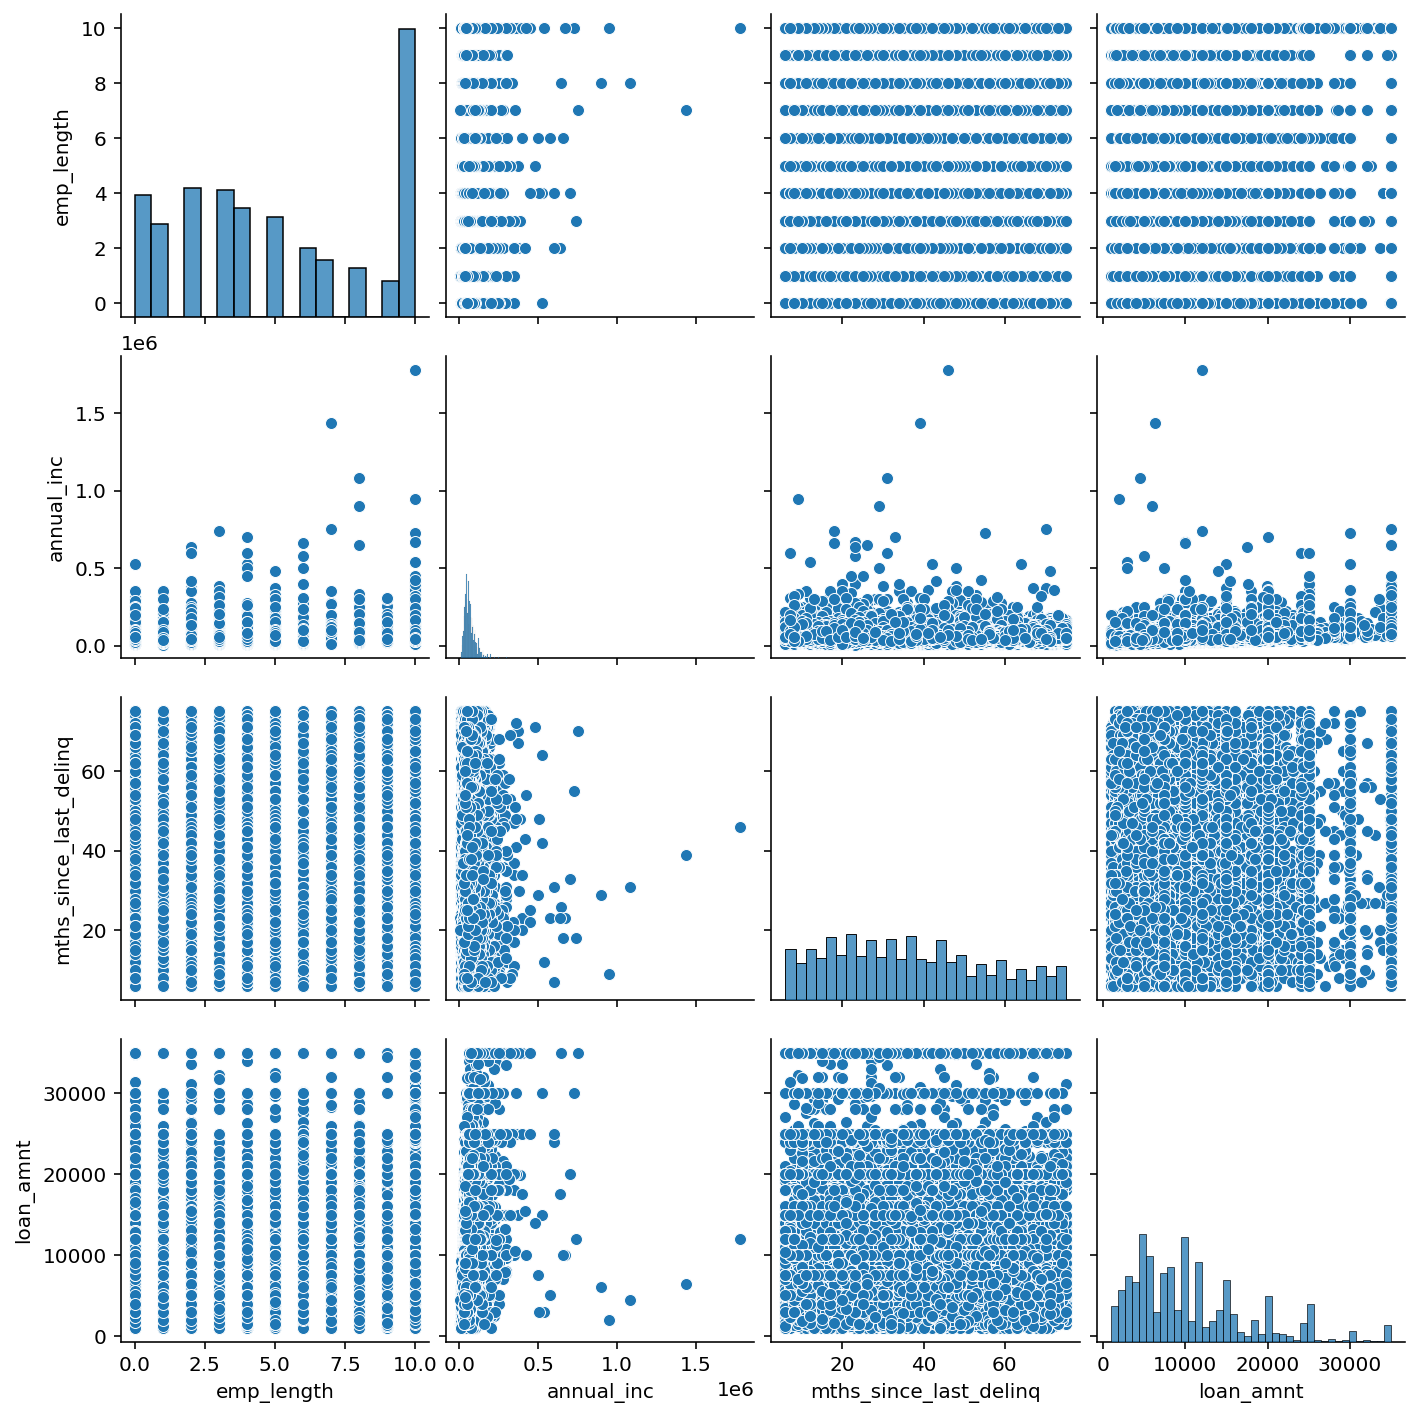

In [62]:
derive_subset = lending_data[['emp_length','annual_inc','mths_since_last_delinq','loan_amnt']]
sns.pairplot(derive_subset)